# Dataset: Facebook data
### https://www.kaggle.com/datasets/sheenabatra/facebook-data/data

## Импорт необходимых библиотек

In [2]:
import pandas as pd
import scipy.stats as sts
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kstest, anderson, normaltest
from itertools import combinations #декартово произведение

In [5]:
alpha = 0.05

In [6]:
df = pd.read_csv(r'C:\Users\mvideo\Desktop\pseudo_facebook.csv', index_col = 'userid')
df

,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
userid,,,,,,,,,,,,,,
2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268299,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202
1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820
1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092


# Задание №1

## Редактирование базы данных
#### В дальнейшем будет разбиение на 2 группы с диапазоном 15 лет. Взяты группы пользователей возраста меньше 50 лет, для относительно небольшого внутригруппового разрыва в поколениях и активности пользователей в социальной сети.

In [7]:
df = df[df.age < 50]

#### Так как пользователи, входящие в группы предполагаются активными, то будем считать, что у них есть хотя бы одно взаимодействие с их друзьями

In [8]:
df = df[df.friendships_initiated >= 1]

#### Удаление нерассматриваемых столбцов

In [9]:
df.drop(['mobile_likes', 'mobile_likes_received', 'www_likes', 'www_likes_received'], axis=1, inplace=True)

## Введем 3 метрики:
#### 1) Количество лайков поставленных за день (likes_pday)
#### 2) Количество друзей (friend_count)
#### 3) Количество полученных лайков в день (received_likes_pday)
#### Также были введены ограничения на некоторые показатели для усиления предпосылки об активности пользователей

In [10]:
df = df[(df.friend_count >= 5) &
(df.friend_count <= df.friend_count.mean() + 3 * df.friend_count.std()) &
(df.likes >= 25) &
(df.likes <= df.likes.mean() + 3 * df.likes.std()) & 
(df.likes_received <= df.likes_received.mean() + 3 * df.likes_received.std()) &
(df.tenure <= df.tenure.mean() + 3 * df.tenure.std()) & 
(df.tenure >= 30) &
(df.likes_received <= df.likes_received.mean() + 3 * df.likes_received.std()) & 
(df.likes_received >= 30)]

#### Создание столбца: Количество поставленных лайков в день

In [11]:
df['likes_pday'] = df['likes']/df['tenure']

#### Создание столбца: Количество полученных лайков в день

In [12]:
df['likes_received_pday'] = df['likes_received']/df['tenure']

## Введем 4 группы:
#### 1) Девушки от 20 до 35 лет

In [13]:
df_f_18 = df[(df.age < 35) & (df.age >= 20) & (df.gender == 'female')] 
df_f_18.shape

(4986, 12)

#### 2) Девушки от 35 до 50 лет

In [14]:
df_f_35 = df[(df.age >= 35) & (df.gender == 'female')] 
df_f_35.shape

(2110, 12)

#### 3) Мужчины от 20 до 35 лет

In [15]:
df_m_18 = df[(df.age < 35) & (df.age >= 20) & (df.gender == 'male')] 
df_m_18.shape

(3515, 12)

#### 4) Мужчины от 35 до 50 лет

In [16]:
df_m_35 = df[(df.age >= 35) & (df.gender == 'male')]
df_m_35.shape

(1127, 12)

#### Резюмируя списками

In [17]:
sectors = [df_m_18, df_f_18, df_m_35, df_f_35]
metrics = ['likes_pday', 'friend_count', 'likes_received_pday' ]
metrics_d = {'likes_pday': 'Количество поставленных лайков в день', 'friend_count': 'Количество друзей', 'likes_received_pday': 'Количество полученных лайков в день'}

#### Построение функций плотности распределения выбранных метрик

C:\Users\mvideo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mvideo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mvideo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mvideo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

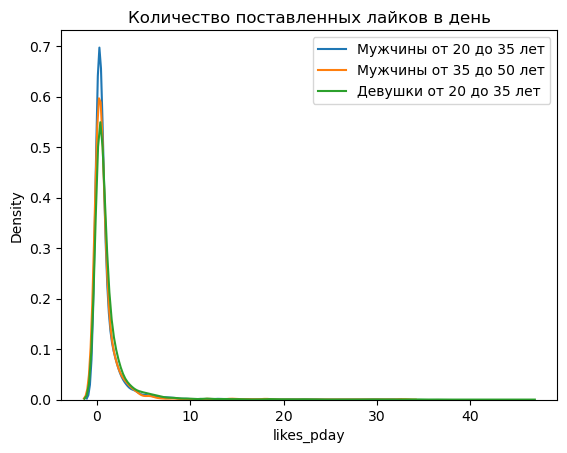

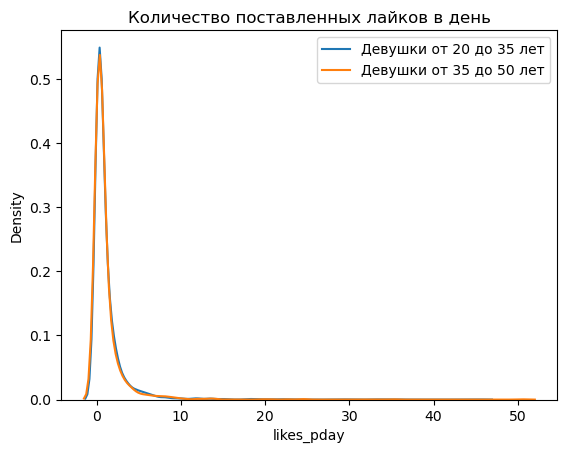

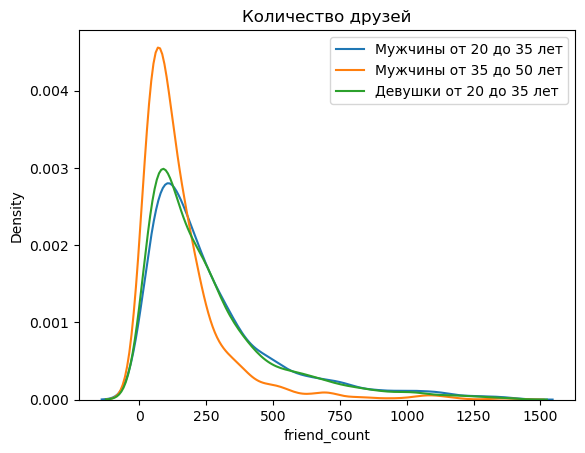

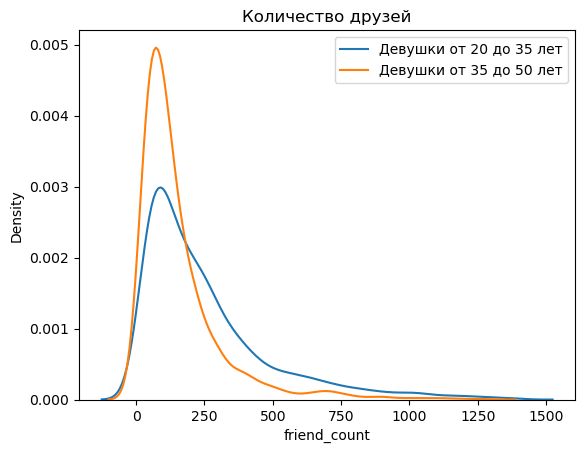

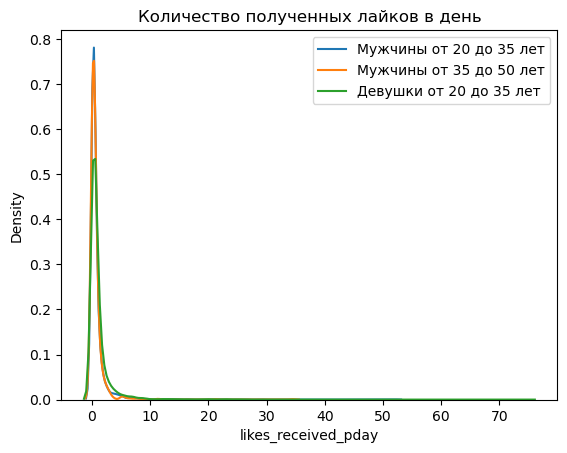

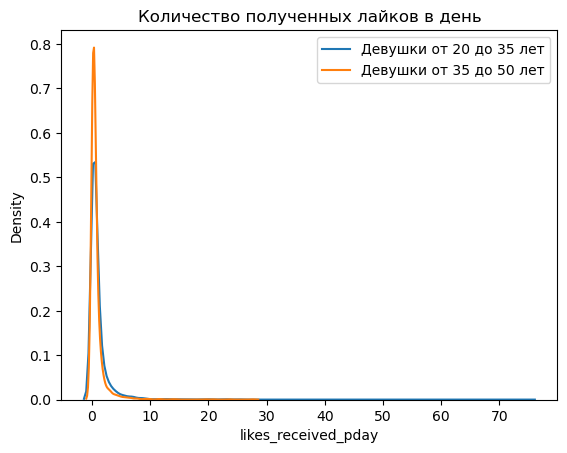

In [18]:
for i in metrics:
    plt.figure()
    sns.kdeplot(df_m_18[i], label='Мужчины от 20 до 35 лет').set_title(metrics_d[i])
    sns.kdeplot(df_m_35[i], label='Мужчины от 35 до 50 лет').set_title(metrics_d[i])
    sns.kdeplot(df_f_18[i], label='Девушки от 20 до 35 лет').set_title(metrics_d[i])
    plt.legend()
    plt.figure()
    sns.kdeplot(df_f_18[i], label='Девушки от 20 до 35 лет').set_title(metrics_d[i])
    sns.kdeplot(df_f_35[i], label='Девушки от 35 до 50 лет').set_title(metrics_d[i])
    plt.legend()

# Задание №2

# Тест Стьюдента

## Метрика: Количество поставленных лайков в день
### Сегменты: Девушки в возрасте [20, 35) и [35;50)

C:\Users\mvideo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mvideo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


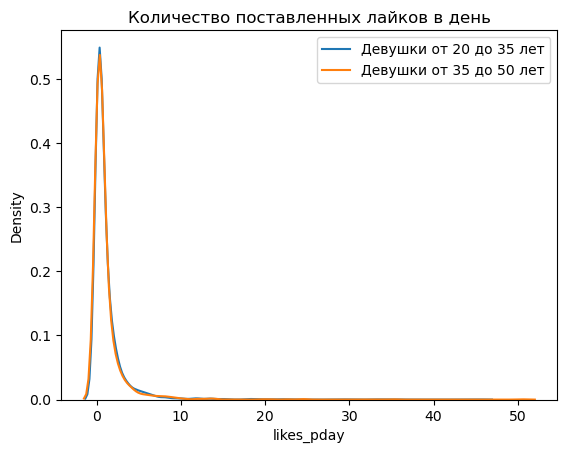

In [19]:
sns.kdeplot(df_f_18['likes_pday'], label='Девушки от 20 до 35 лет').set_title(metrics_d['likes_pday'])
sns.kdeplot(df_f_35['likes_pday'], label='Девушки от 35 до 50 лет').set_title(metrics_d['likes_pday'])
plt.legend()

In [20]:
print('P-value:', sts.ttest_ind(df_f_18.likes_pday, df_f_35.likes_pday, equal_var=False).pvalue)

P-value: 0.06426446477354984


### Гипотеза H0: равенство средних двух выборок, НЕ ОТВЕРГАЕТСЯ, поскольку p-value больше 5% уровня значимости

## Метрика: Количество друзей
### Сегменты: мужчины и девушки в возрасте [35;50)

C:\Users\mvideo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mvideo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


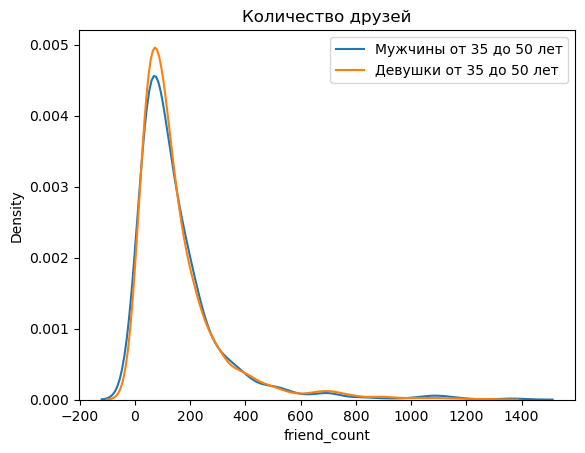

In [21]:
sns.kdeplot(df_m_35['friend_count'], label='Мужчины от 35 до 50 лет').set_title(metrics_d['friend_count'])
sns.kdeplot(df_f_35['friend_count'], label='Девушки от 35 до 50 лет').set_title(metrics_d['friend_count'])
plt.legend()

In [22]:
print('P-value:', sts.ttest_ind(df_m_35.friend_count, df_f_35.friend_count, equal_var=False).pvalue)

P-value: 0.8959768426076582


### Гипотеза H0: равенство средних двух выборок, НЕ ОТВЕРГАЕТСЯ, поскольку p-value больше любого разумного уровня значимости

## Метрика: Количество полученных лайков в день
### Сегменты: Мужчины и женщины в возрасте [20; 35) и [35;50) соответственно 

C:\Users\mvideo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mvideo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


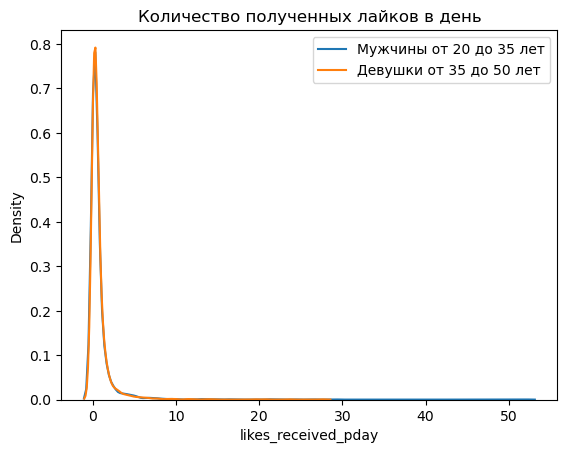

In [23]:
sns.kdeplot(df_m_18['likes_received_pday'], label='Мужчины от 20 до 35 лет').set_title(metrics_d['likes_received_pday'])
sns.kdeplot(df_f_35['likes_received_pday'], label='Девушки от 35 до 50 лет').set_title(metrics_d['likes_received_pday'])
plt.legend()

In [24]:
print('P-value:', sts.ttest_ind(df_f_35['likes_received_pday'], df_m_18['likes_received_pday'], equal_var=False).pvalue)

P-value: 0.9919740211814119


### Гипотеза H0: равенство средних двух выборок, НЕ ОТВЕРГАЕТСЯ, поскольку p-value больше любого разумного уровня значимости

#### Для ускорения процесса сделаем словари из имен

In [25]:
sectors = {'M20': df_m_18, 'F20': df_f_18, 'M35': df_m_35, 'F35': df_f_35}
sectors_nd = {'M20': 'Мужчины от 20 до 35 лет', 'F20': 'Женщины от 20 до 35 лет', 'M35': 'Мужчины от 35 до 50 лет',
              'F35': 'Женщины от 35 до 50 лет'}
comb_sect = list(combinations(sectors, 2)) #Декартово произведение из секторов без перестановок

# Тест Манна Уитни

C:\Users\mvideo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mvideo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mvideo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mvideo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

<Figure size 640x480 with 0 Axes>

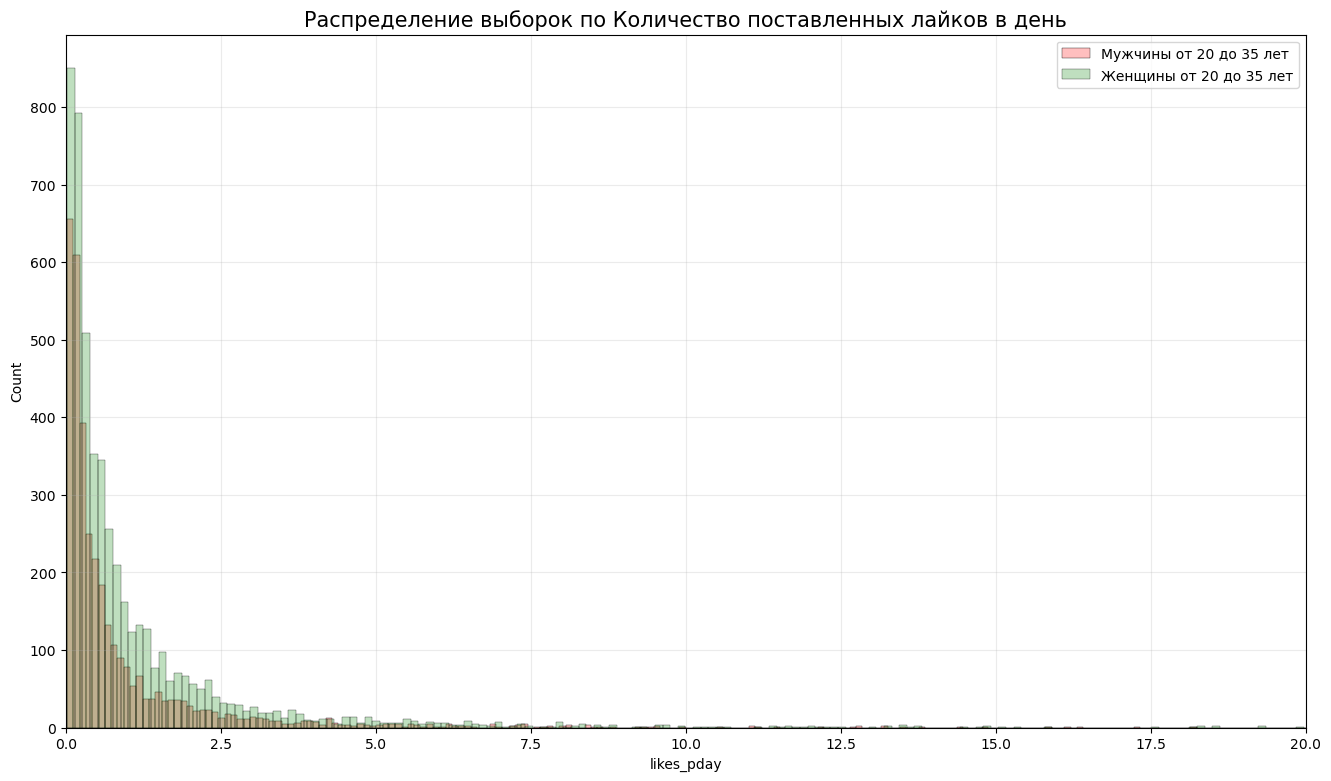

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

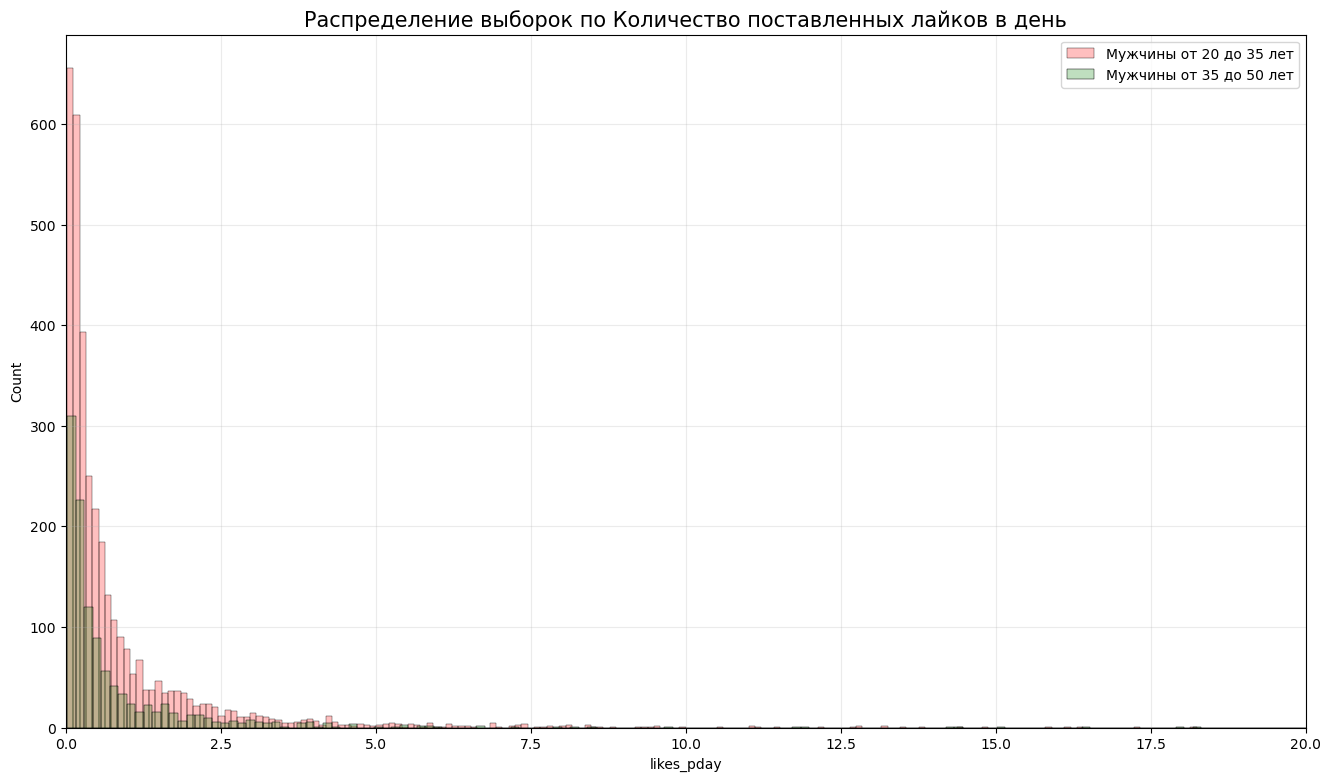

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

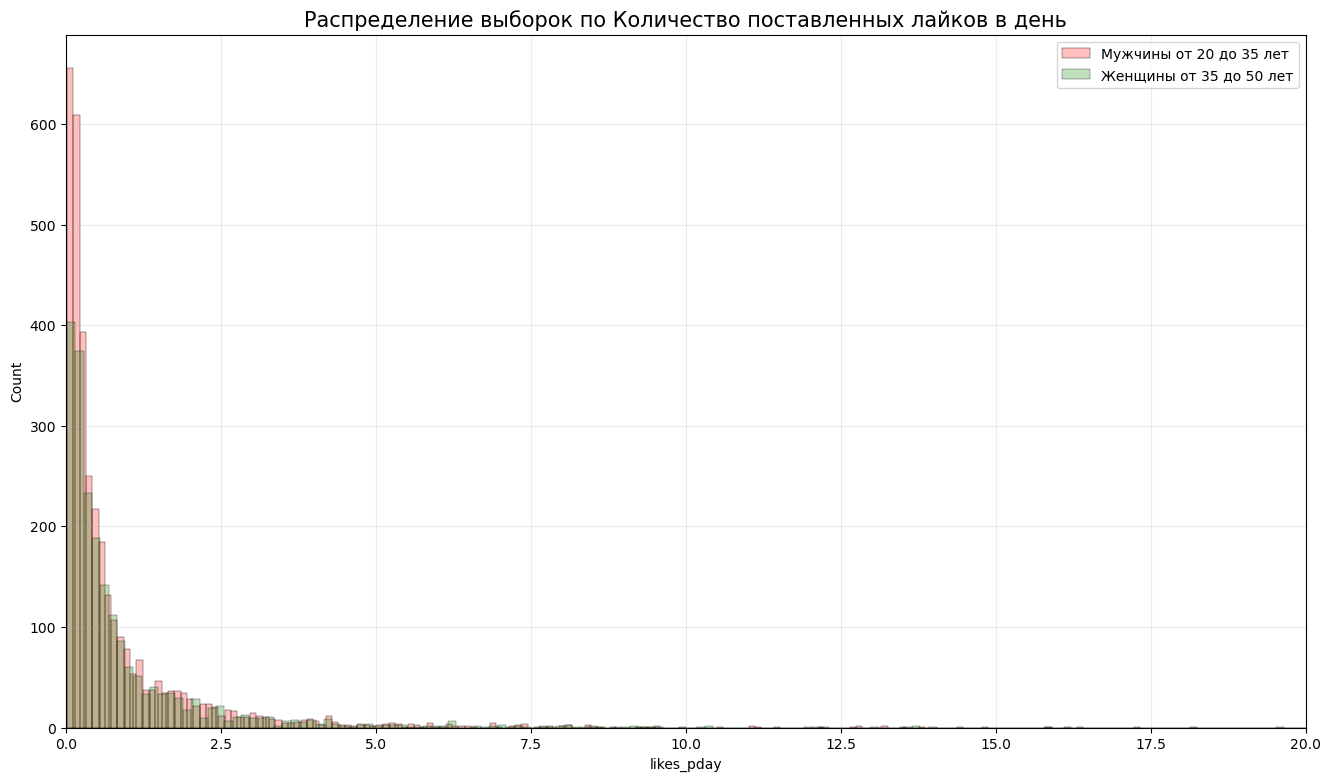

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

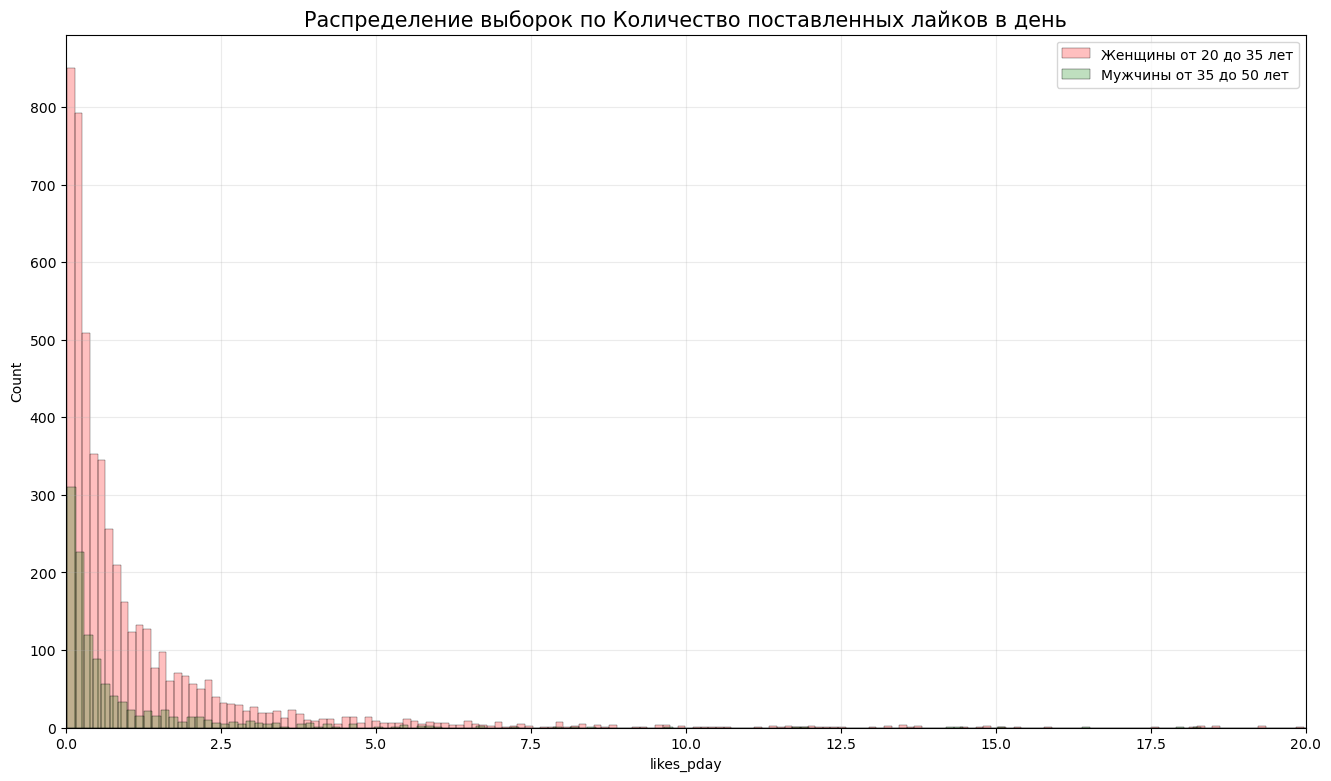

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

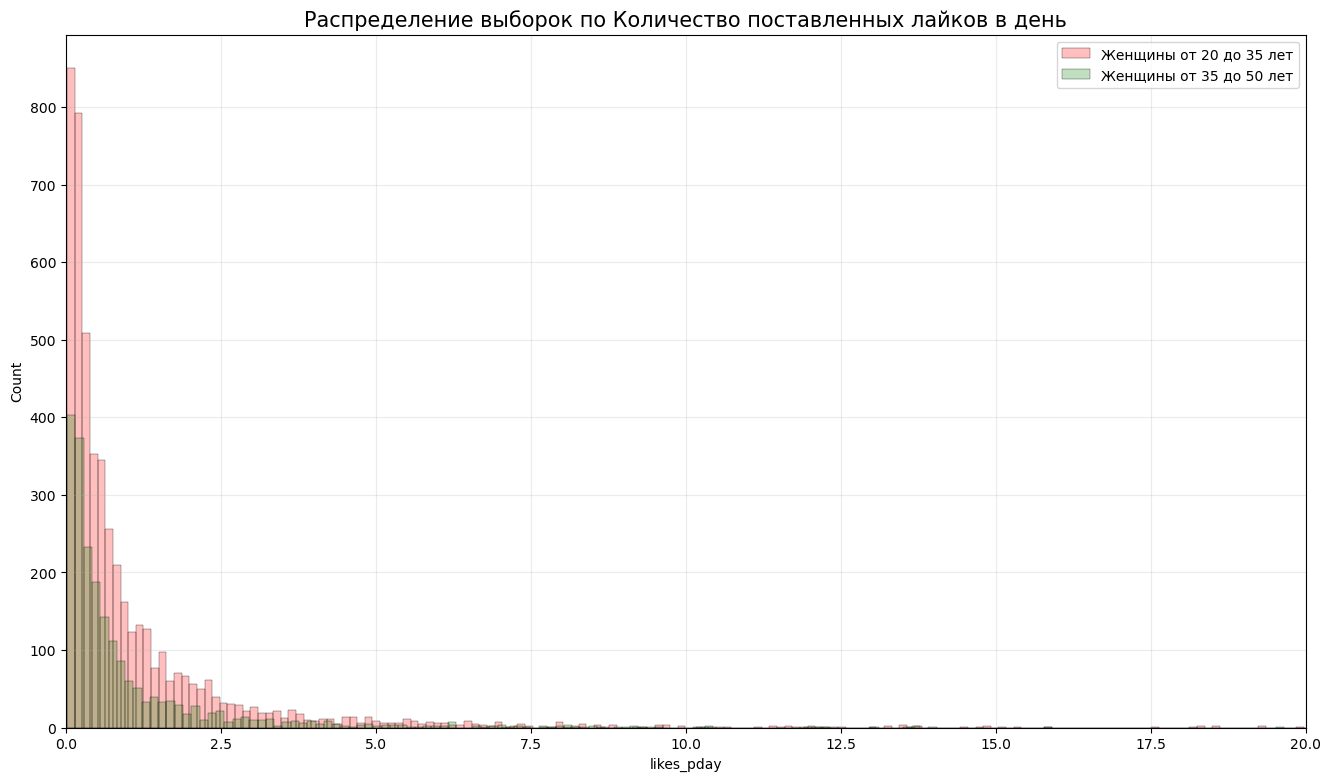

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

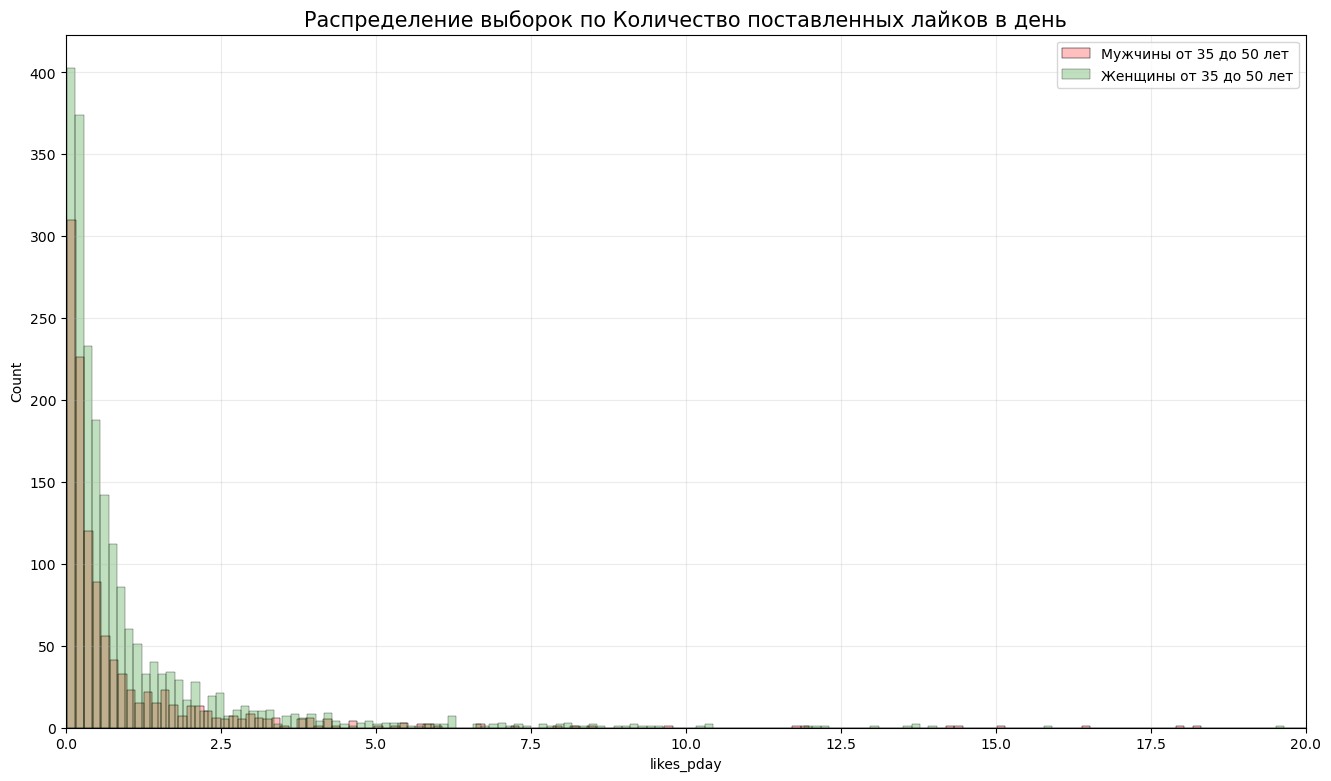

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

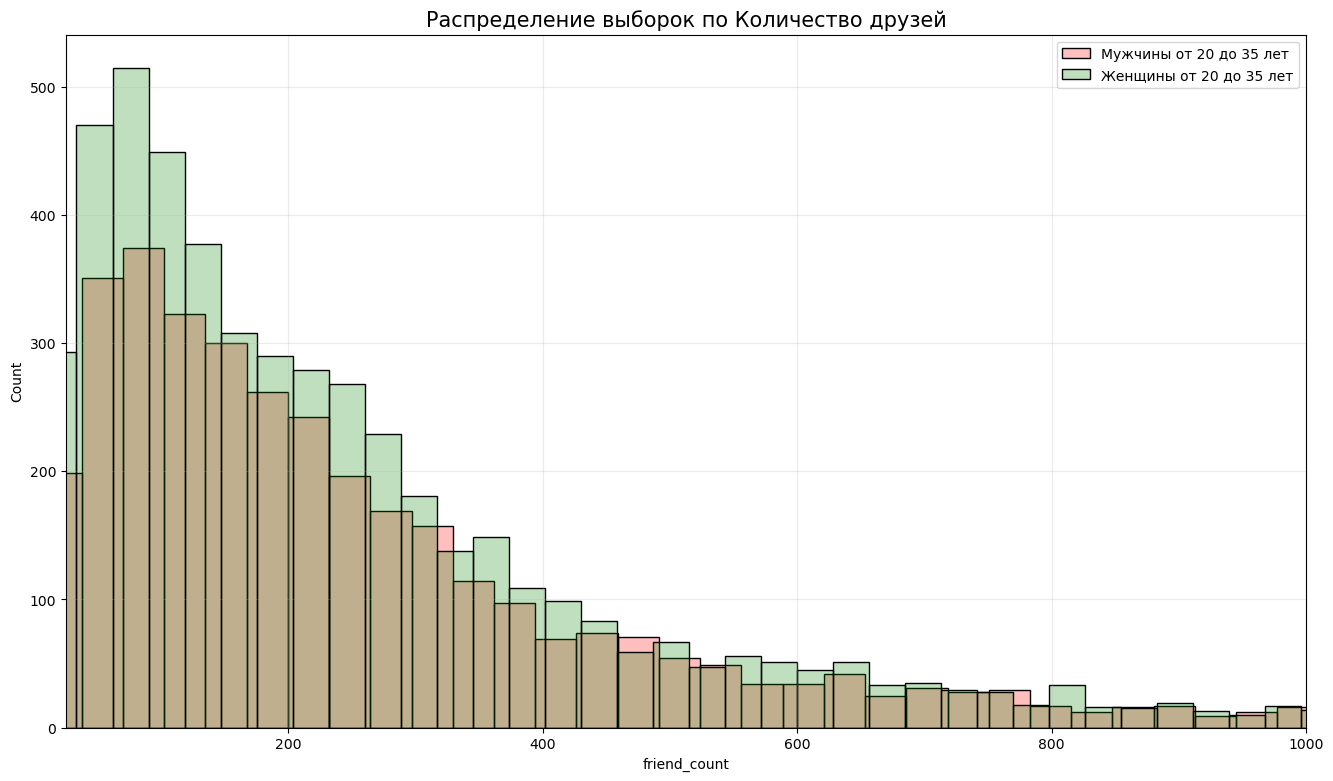

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

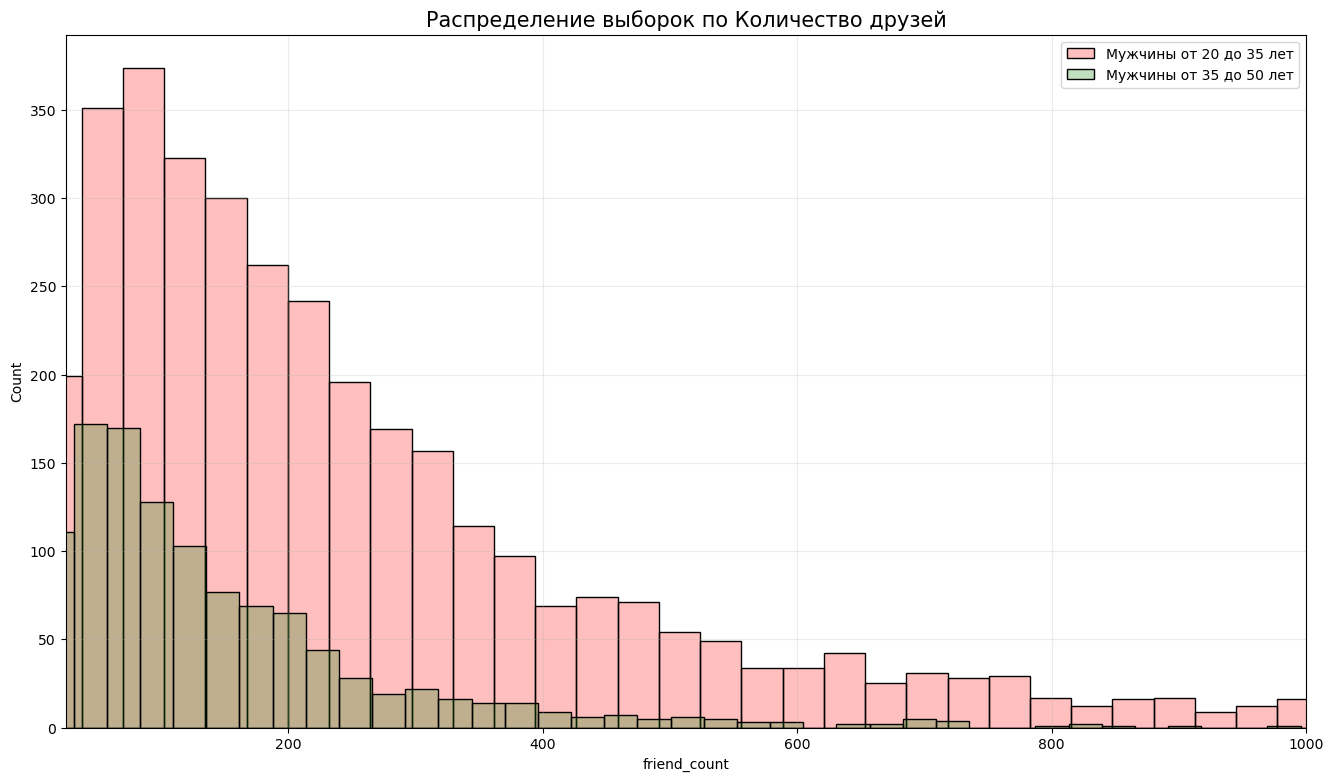

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

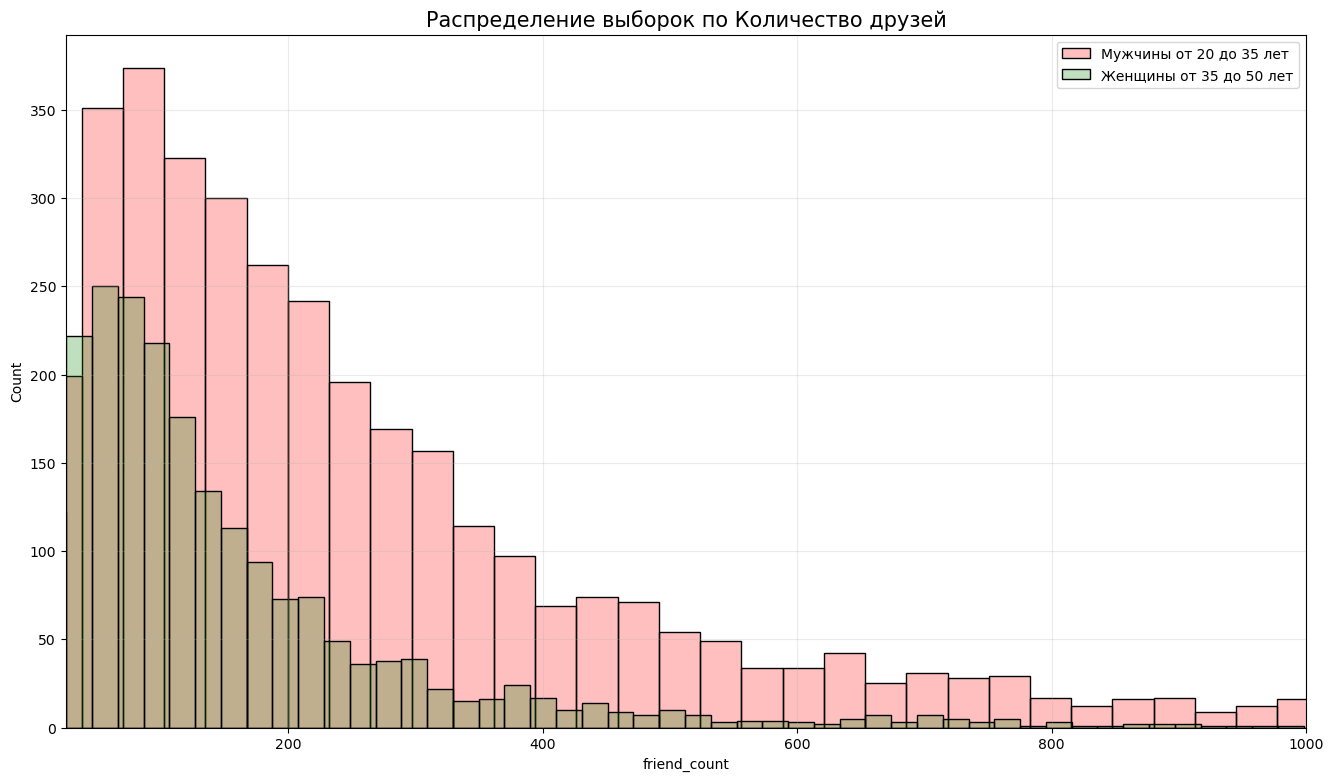

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

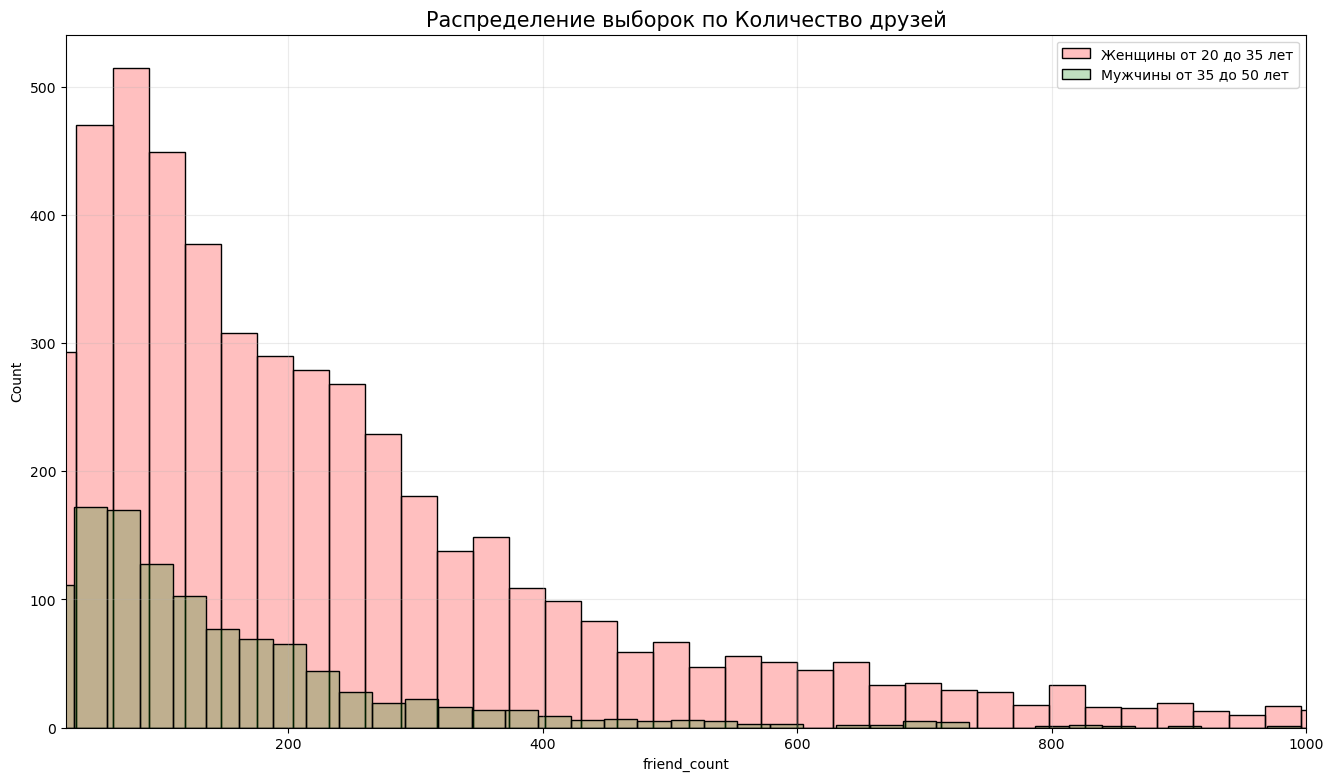

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

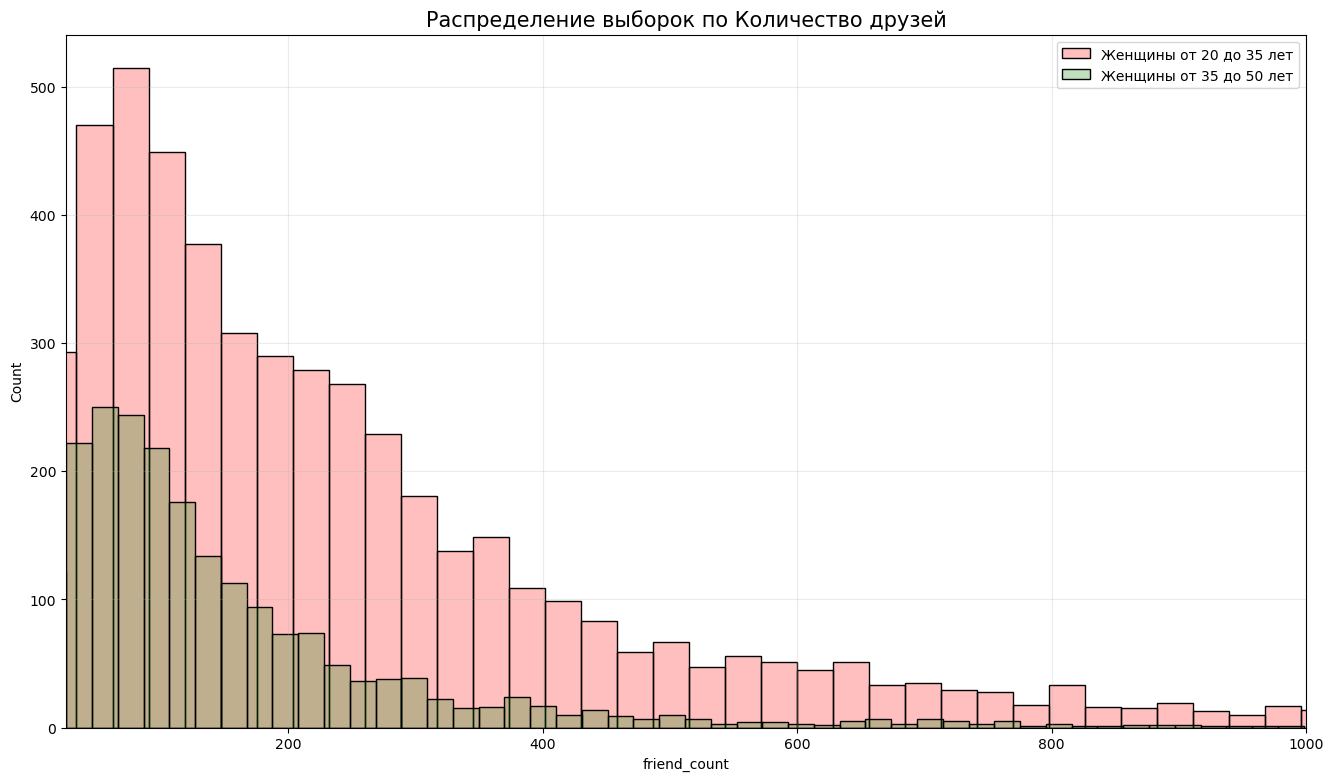

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

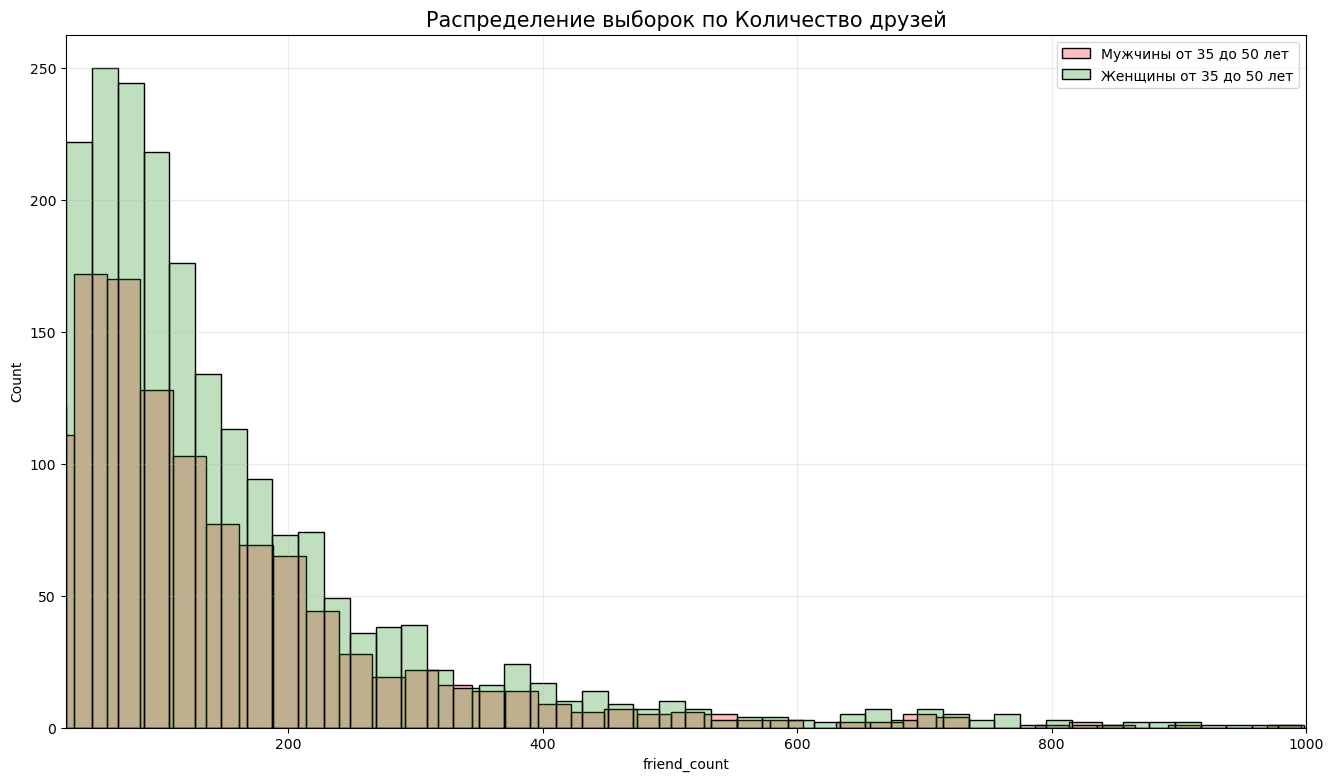

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

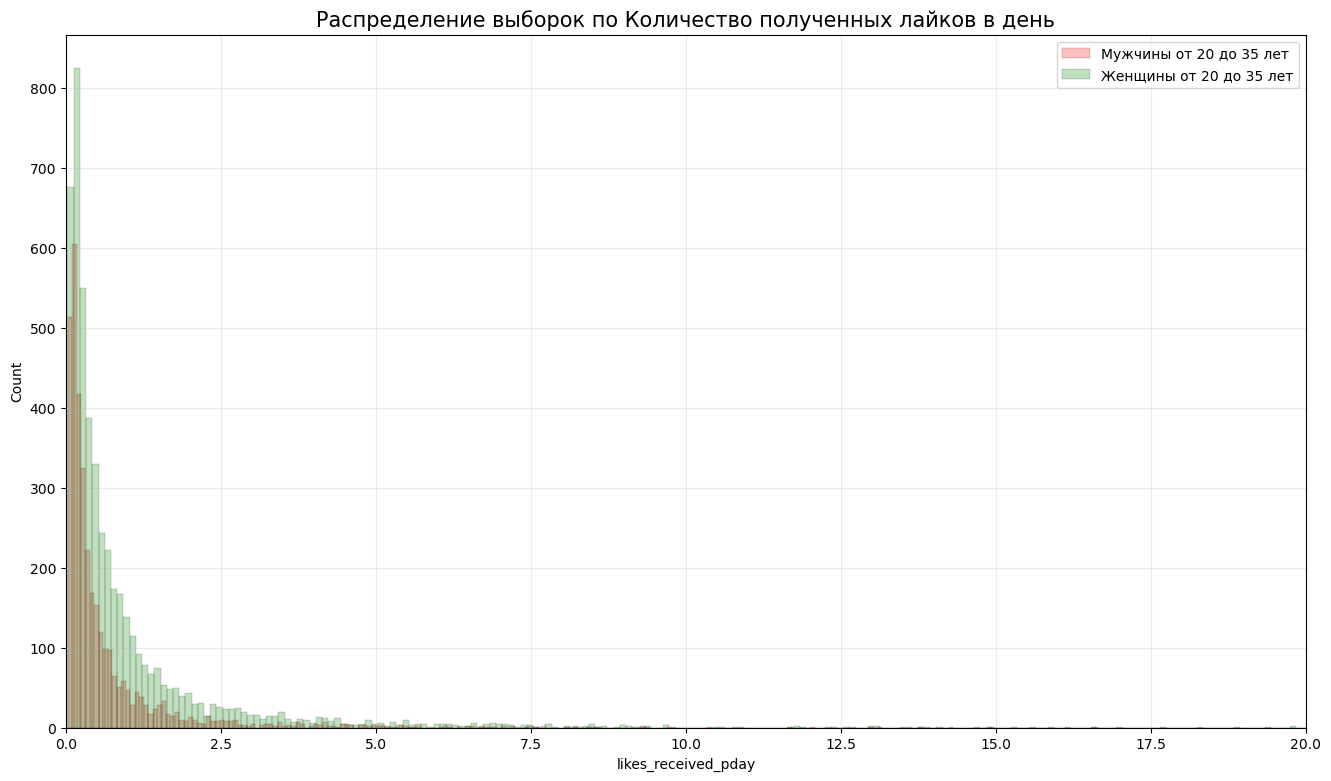

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

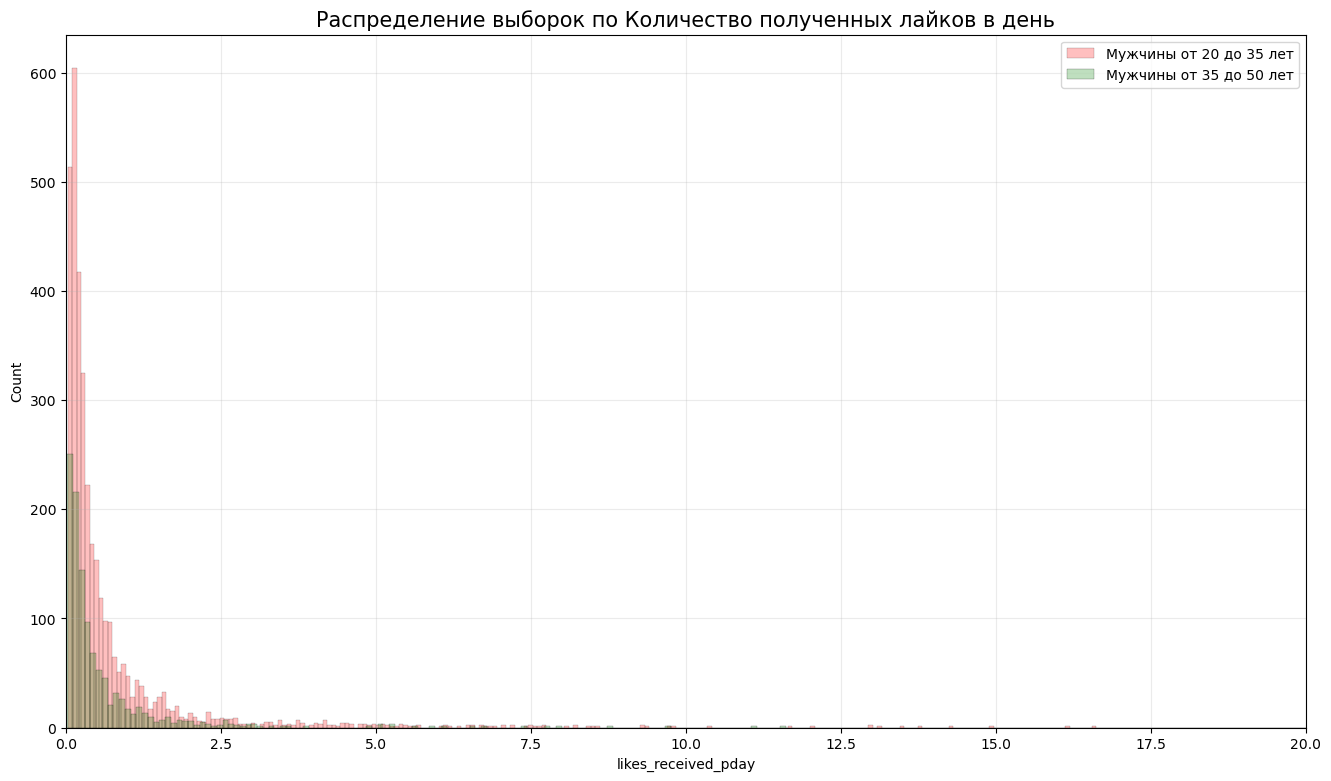

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

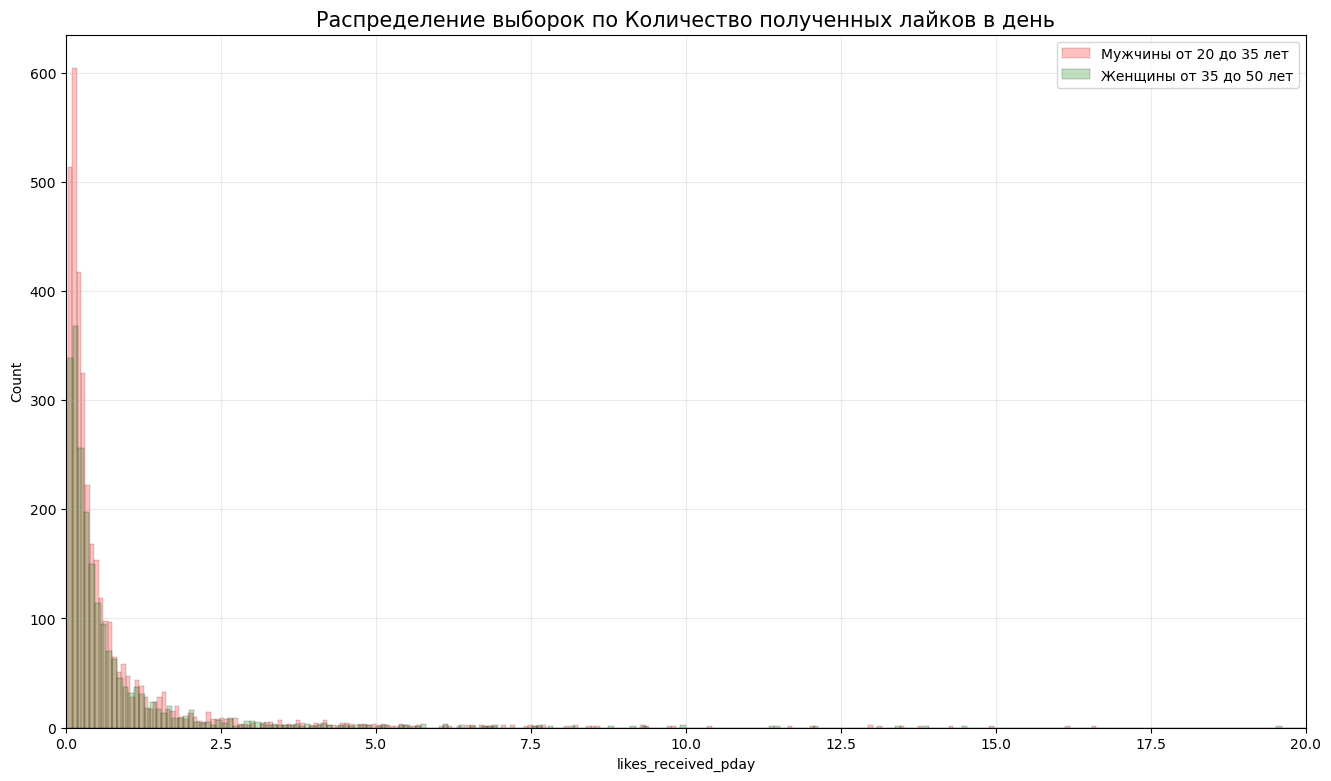

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

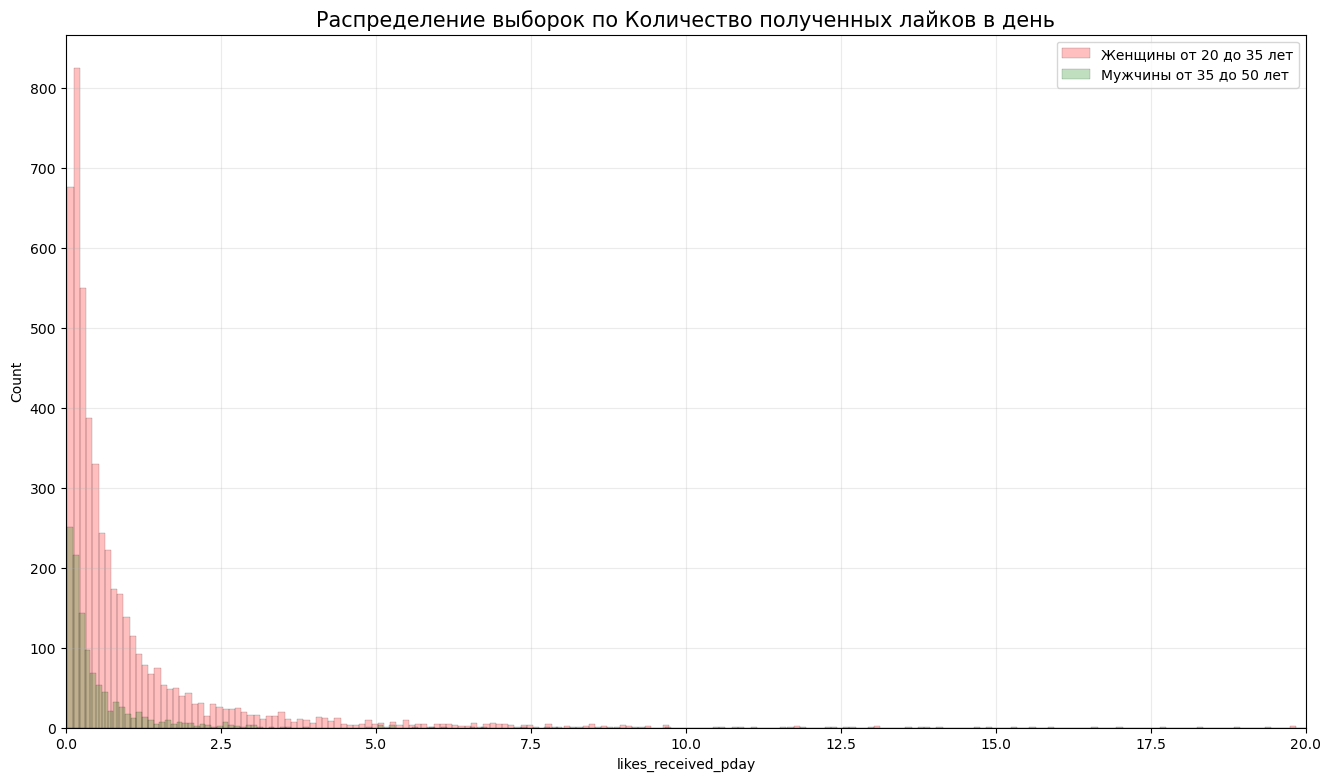

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

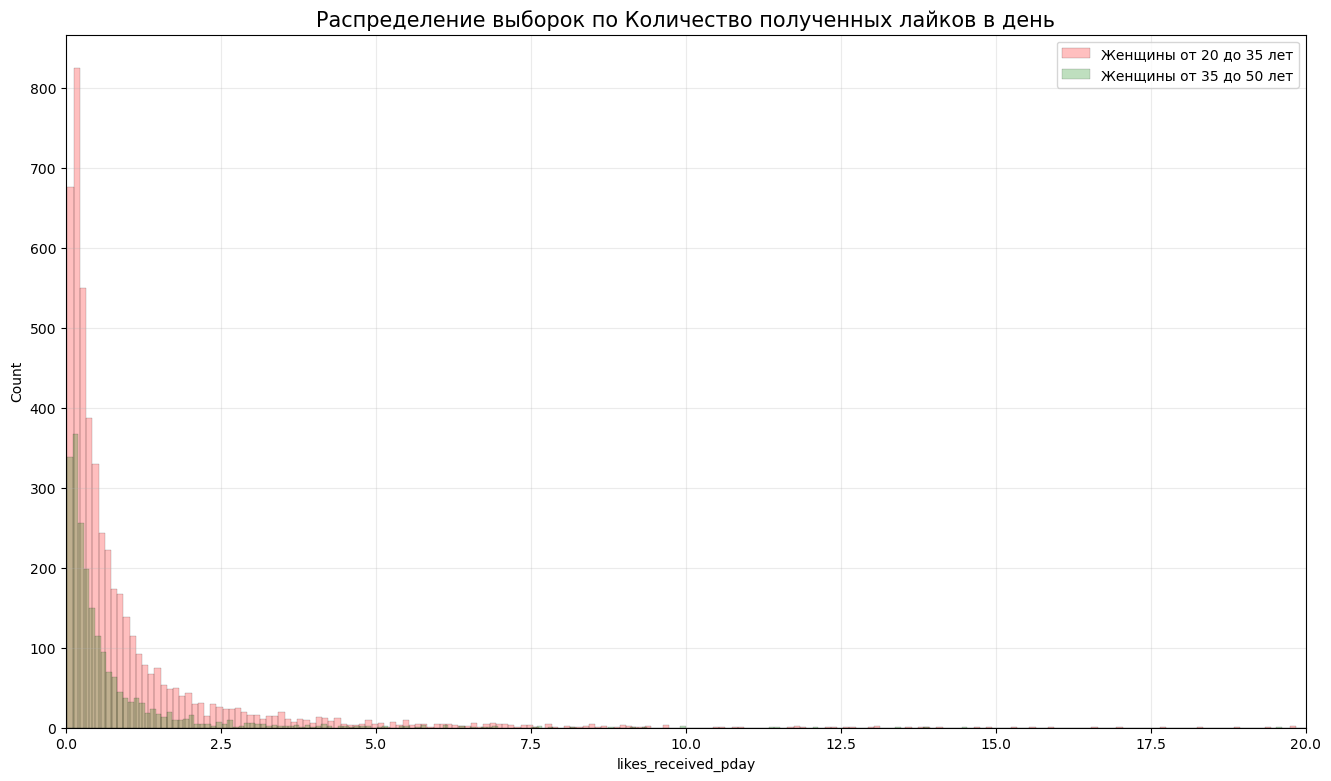

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

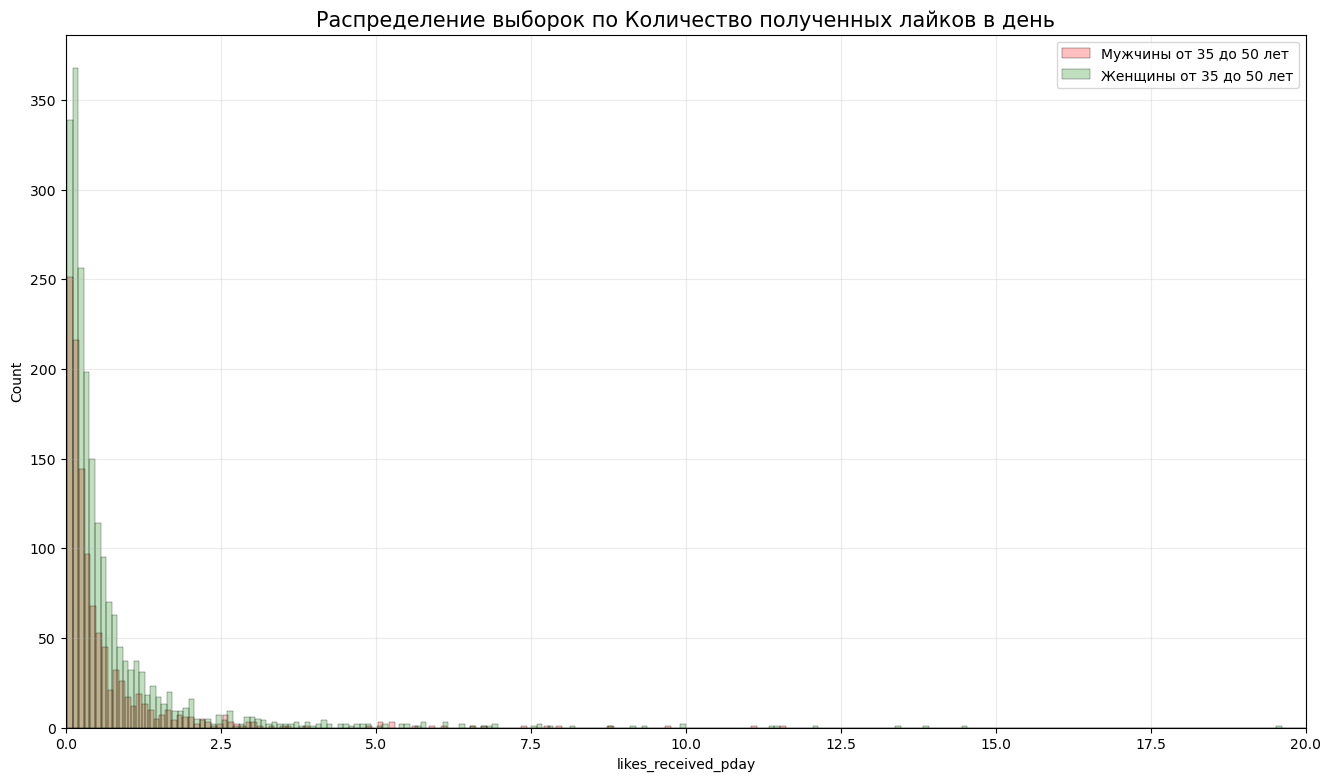

<Figure size 640x480 with 0 Axes>

In [26]:
for j in metrics:
    for i in comb_sect:
        plt.figure()
        plt.figure(figsize=(16, 9))
        plt.grid(alpha=0.25)
        
        ax = sns.histplot(sectors[i[0]][j], color='red', alpha=0.25, label=sectors_nd[i[0]])
        sns.histplot(sectors[i[1]][j], color='green', alpha=0.25, ax=ax, label=sectors_nd[i[1]])
        _ = ax.set_title(f'Распределение выборок по {metrics_d[j]}', size=15)
        if j != 'friend_count':
            _ = ax.set_xlim(0, 20)
        else:
            _ = ax.set_xlim(25, 1000)
        ax.legend()
        plt.figure()

## Метрика: Количество поставленных лайков
### Сегменты: мужчины и девушки в возрасте [35, 50)

C:\Users\mvideo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mvideo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


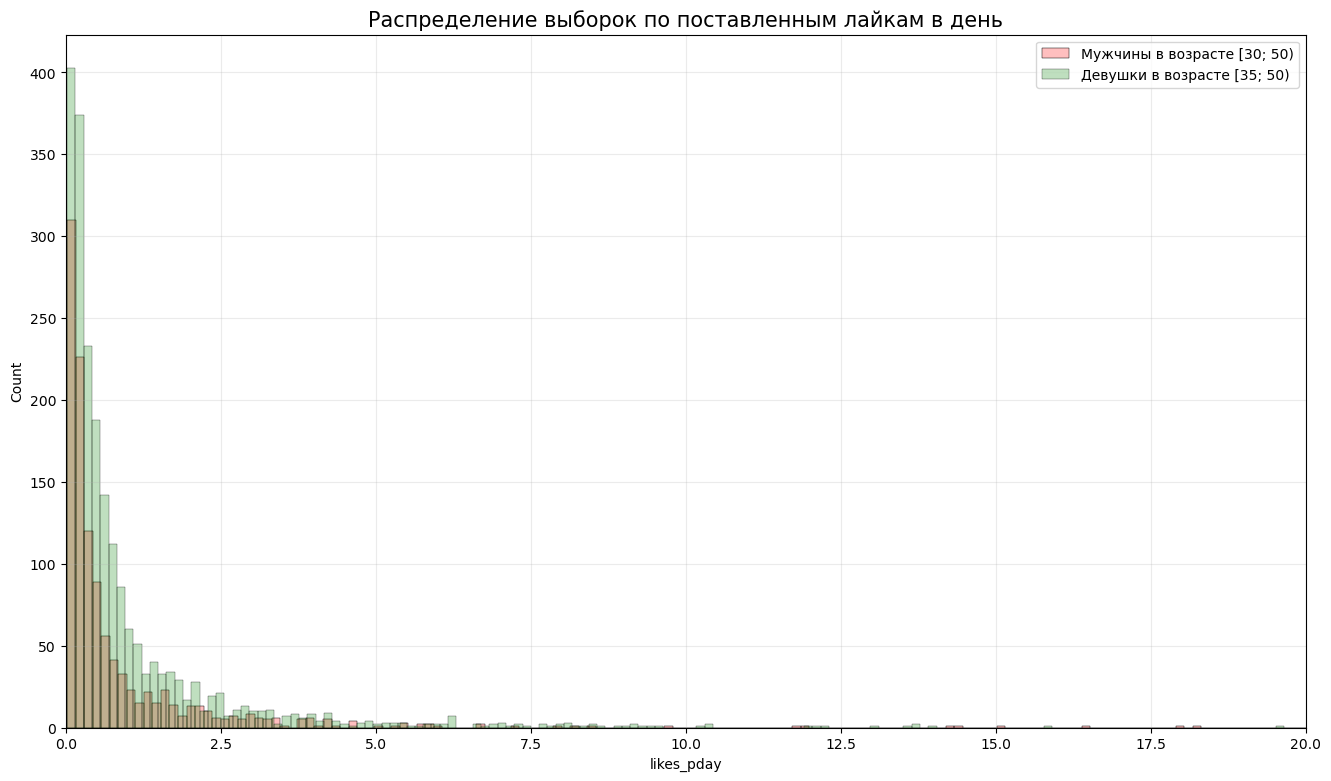

In [27]:
plt.figure(figsize=(16, 9))
plt.grid(alpha=0.25)

ax = sns.histplot(df_m_35['likes_pday'], color='red', alpha=0.25, label='Мужчины в возрасте [30; 50)')
sns.histplot(df_f_35['likes_pday'], color='green', alpha=0.25, ax=ax, label='Девушки в возрасте [35; 50)')
_ = ax.set_title('Распределение выборок по поставленным лайкам в день', size=15)
_ = ax.set_xlim(0, 20)
ax.legend()

In [28]:
print('P-value:', sts.mannwhitneyu(df_m_35['likes_pday'], df_f_35['likes_pday'], alternative='two-sided').pvalue)

P-value: 2.6727916587714425e-08


### Гипотеза H0: равенство функций распределений двух выборок, НЕ ПРИНИМАЕТСЯ, поскольку p-value меньше любого разумного уровня значимости

## Метрика: Количество полученных лайков
### Сегменты: Мужчины и женщины в возрасте [20; 35) и [35;50) 

C:\Users\mvideo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mvideo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


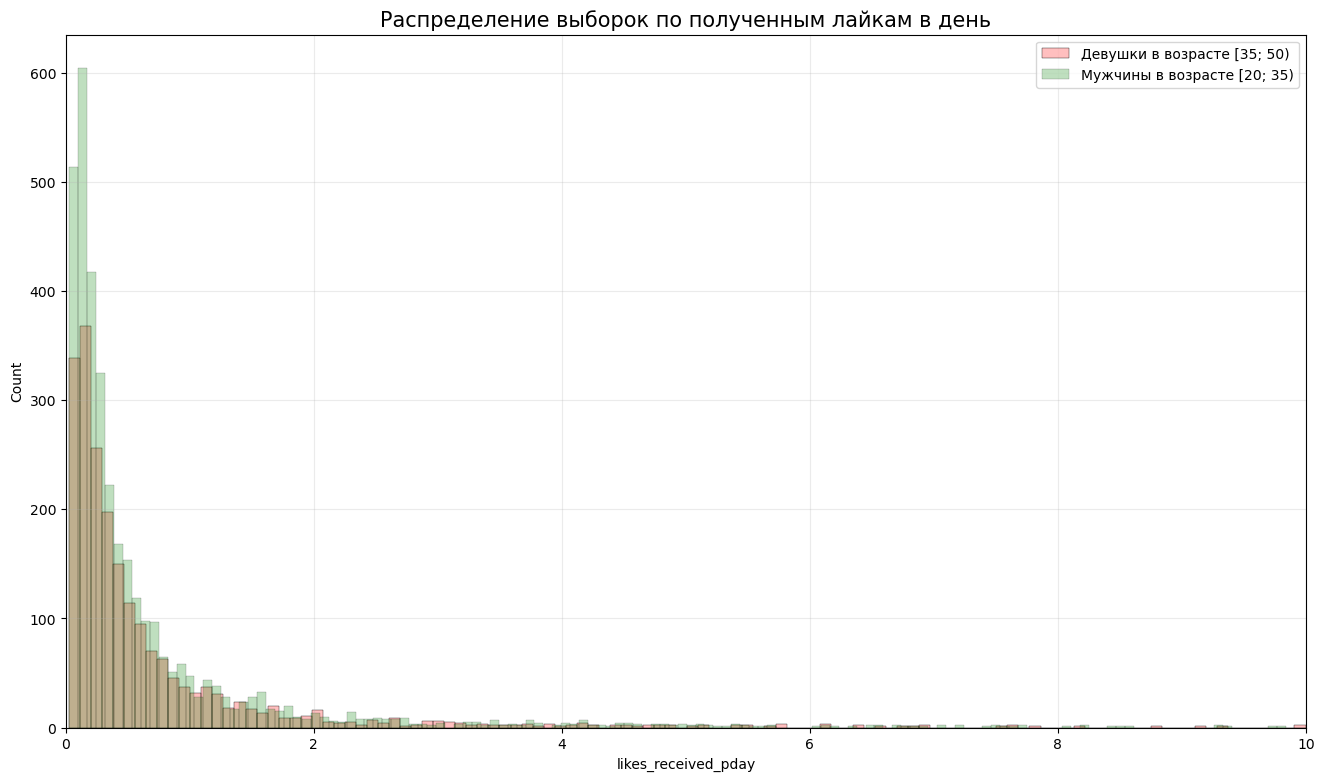

In [29]:
plt.figure(figsize=(16, 9))
plt.grid(alpha=0.25)

ax = sns.histplot(df_f_35['likes_received_pday'], color='red', alpha=0.25, label='Девушки в возрасте [35; 50)')
sns.histplot(df_m_18['likes_received_pday'], color='green', alpha=0.25, ax=ax, label='Мужчины в возрасте [20; 35)')
_ = ax.set_title('Распределение выборок по полученным лайкам в день', size=15)
_ = ax.set_xlim(0, 10)
ax.legend()

In [30]:
print('P-value:', sts.mannwhitneyu(df_m_18['likes_received_pday'], df_f_35['likes_received_pday'], alternative='two-sided').pvalue)

P-value: 0.0042199491920985885


### Гипотеза H0: равенство функций распределений двух выборок, НЕ ПРИНИМАЕТСЯ, поскольку p-value меньше любого разумного уровня значимости

## Метрика: Количество друзей
### Сегменты: мужчины и девушки в возрасте [35;50)

In [1]:
plt.figure(figsize=(16, 9))
plt.grid(alpha=0.25)

ax = sns.histplot(df_m_35['friend_count'], color='red', alpha=0.25, label='Мужчины в возрасте [35; 50)')
sns.histplot(df_f_35['friend_count'], color='green', alpha=0.25, ax=ax, label='Женщины в возрасте [35; 50)')
_ = ax.set_title('Распределение выборок по количеству друзей в социальной сети Facebook', size=15)
_ = ax.set_xlim(5, 1000)
ax.legend()

NameError: name 'plt' is not defined

In [32]:
print('P-value:', sts.mannwhitneyu(df_m_35['friend_count'], df_f_35['friend_count'], alternative='two-sided').pvalue)

P-value: 0.6557534445008392


### Гипотеза H0: равенство функций распределений двух выборок, НЕ ОТВЕРГАЕТСЯ, поскольку p-value больше любого разумного уровня значимости

# Тест Фишера для сравнения 4 выборок

In [43]:
for i in metrics:
    print(f'Метрика: {metrics_d[i]}')
    print('Секторы: Все')
    test = sts.f_oneway(df_m_18[i], df_m_35[i], df_f_18[i], df_f_35[i]).pvalue
    print(f'P-value: {test:.3f}')
    if test > 0.01:
        print('!!! Гипотеза: средние для ЧЕТЫРЕХ выборок равны, НЕ ОТВЕРГАЕТСЯ , поскольку p-value больше 1% уровня значимости')
        print()
    else:
        print('!!! Гипотеза: средние для ЧЕТЫРЕХ выборок равны, НЕ ПРИНИМАЕТСЯ, поскольку p-value меньше 1% уровня значимости')
        print()

Метрика: Количество поставленных лайков в день
Секторы: Все
P-value: 0.000
!!! Гипотеза: средние для ЧЕТЫРЕХ выборок равны, НЕ ПРИНИМАЕТСЯ, поскольку p-value меньше 1% уровня значимости

Метрика: Количество друзей
Секторы: Все
P-value: 0.000
!!! Гипотеза: средние для ЧЕТЫРЕХ выборок равны, НЕ ПРИНИМАЕТСЯ, поскольку p-value меньше 1% уровня значимости

Метрика: Количество полученных лайков в день
Секторы: Все
P-value: 0.000
!!! Гипотеза: средние для ЧЕТЫРЕХ выборок равны, НЕ ПРИНИМАЕТСЯ, поскольку p-value меньше 1% уровня значимости



# Вывод №1
#### Равенство средних во всех четырех выборках при каждой метрике вероятно отсутствует (Тест Фишера)
#### Тест Стьюдента и Манна Уитни показал, что средние и функции распределения количества друзей для мужчин и женщин возраста [35; 50) вероятно совпадают
#### Также, есть выборки 2 выборки по двум оставшимся метрикам, которые прошли тест Стьюдента на равенство средних, но не прошли тест Манна Уитни

# Задание №3

# Тест Стьюдента для попарного сравнения выборок

In [44]:
for j in metrics:
    ct = 0
    print(f'Метрика: {metrics_d[j]}')
    for i in comb_sect:
        ct += 1
        print(f'{ct}) Секторы: {sectors_nd[i[0]], sectors_nd[i[1]]}')
        test_st = sts.ttest_ind(sectors[i[0]][j], sectors[i[1]][j], equal_var=False).pvalue
        print(f'P-value: {test_st:.3f}')
        if test_st > 0.01:
            print('!!! Гипотеза: равенство средних двух выборок, НЕ ОТВЕРГАЕТСЯ, поскольку p-value больше 1% уровня значимости')
        print()
    print('--' * 50)

Метрика: Количество поставленных лайков в день
1) Секторы: ('Мужчины от 20 до 35 лет', 'Женщины от 20 до 35 лет')
P-value: 0.000

2) Секторы: ('Мужчины от 20 до 35 лет', 'Мужчины от 35 до 50 лет')
P-value: 0.424
!!! Гипотеза: равенство средних двух выборок, НЕ ОТВЕРГАЕТСЯ, поскольку p-value больше 1% уровня значимости

3) Секторы: ('Мужчины от 20 до 35 лет', 'Женщины от 35 до 50 лет')
P-value: 0.016
!!! Гипотеза: равенство средних двух выборок, НЕ ОТВЕРГАЕТСЯ, поскольку p-value больше 1% уровня значимости

4) Секторы: ('Женщины от 20 до 35 лет', 'Мужчины от 35 до 50 лет')
P-value: 0.000

5) Секторы: ('Женщины от 20 до 35 лет', 'Женщины от 35 до 50 лет')
P-value: 0.064
!!! Гипотеза: равенство средних двух выборок, НЕ ОТВЕРГАЕТСЯ, поскольку p-value больше 1% уровня значимости

6) Секторы: ('Мужчины от 35 до 50 лет', 'Женщины от 35 до 50 лет')
P-value: 0.010

----------------------------------------------------------------------------------------------------
Метрика: Количество друзей
1) 

# Тест Фишера для попарного сравнения выборок

In [45]:
for j in metrics:
    ct = 0
    print(f'Метрика: {metrics_d[j]}')
    for i in comb_sect:
        ct += 1
        print(f'{ct}) Секторы: {sectors_nd[i[0]], sectors_nd[i[1]]}')
        test_f = sts.f_oneway(sectors[i[0]][j], sectors[i[1]][j]).pvalue
        print(f'P-value: {test_f:.3f}')
        if test_f > 0.01:
            print('!!! Гипотеза: средние для ДВУХ выборок равны, НЕ ОТВЕРГАЕТСЯ, поскольку p-value больше 1% уровня значимости')
        print()
    print('--' * 50)

Метрика: Количество поставленных лайков в день
1) Секторы: ('Мужчины от 20 до 35 лет', 'Женщины от 20 до 35 лет')
P-value: 0.000

2) Секторы: ('Мужчины от 20 до 35 лет', 'Мужчины от 35 до 50 лет')
P-value: 0.420
!!! Гипотеза: средние для ДВУХ выборок равны, НЕ ОТВЕРГАЕТСЯ, поскольку p-value больше 1% уровня значимости

3) Секторы: ('Мужчины от 20 до 35 лет', 'Женщины от 35 до 50 лет')
P-value: 0.011
!!! Гипотеза: средние для ДВУХ выборок равны, НЕ ОТВЕРГАЕТСЯ, поскольку p-value больше 1% уровня значимости

4) Секторы: ('Женщины от 20 до 35 лет', 'Мужчины от 35 до 50 лет')
P-value: 0.000

5) Секторы: ('Женщины от 20 до 35 лет', 'Женщины от 35 до 50 лет')
P-value: 0.071
!!! Гипотеза: средние для ДВУХ выборок равны, НЕ ОТВЕРГАЕТСЯ, поскольку p-value больше 1% уровня значимости

6) Секторы: ('Мужчины от 35 до 50 лет', 'Женщины от 35 до 50 лет')
P-value: 0.015
!!! Гипотеза: средние для ДВУХ выборок равны, НЕ ОТВЕРГАЕТСЯ, поскольку p-value больше 1% уровня значимости

-----------------------

# Вывод №2
### Тесты Стьюдента и Фишера совпадают при всех метриках и комбинациях сегментов внутри них.
### Выборки, которые могут быть связаны:

In [46]:
for j in metrics:
    ct = 0
    print(f'Метрика: {metrics_d[j]}')
    for i in comb_sect:
        test_f = sts.f_oneway(sectors[i[0]][j], sectors[i[1]][j]).pvalue
        if test_f > 0.01:
            ct += 1
            print(f'{ct}) Секторы: {sectors_nd[i[0]], sectors_nd[i[1]]}')
            print(f'P-value: {test_f:.3f}')
            print()
    print('--' * 50)

Метрика: Количество поставленных лайков в день
1) Секторы: ('Мужчины от 20 до 35 лет', 'Мужчины от 35 до 50 лет')
P-value: 0.420

2) Секторы: ('Мужчины от 20 до 35 лет', 'Женщины от 35 до 50 лет')
P-value: 0.011

3) Секторы: ('Женщины от 20 до 35 лет', 'Женщины от 35 до 50 лет')
P-value: 0.071

4) Секторы: ('Мужчины от 35 до 50 лет', 'Женщины от 35 до 50 лет')
P-value: 0.015

----------------------------------------------------------------------------------------------------
Метрика: Количество друзей
1) Секторы: ('Мужчины от 35 до 50 лет', 'Женщины от 35 до 50 лет')
P-value: 0.894

----------------------------------------------------------------------------------------------------
Метрика: Количество полученных лайков в день
1) Секторы: ('Мужчины от 20 до 35 лет', 'Мужчины от 35 до 50 лет')
P-value: 0.058

2) Секторы: ('Мужчины от 20 до 35 лет', 'Женщины от 35 до 50 лет')
P-value: 0.992

3) Секторы: ('Мужчины от 35 до 50 лет', 'Женщины от 35 до 50 лет')
P-value: 0.050

---------------

# Задание №4

## Точный доверитальный интервал

In [47]:
def exact_interv(a, b):
    ct1 = a.shape[0]
    ct2 = b.shape[0]

    v = (sts.sem(a) ** 2 + sts.sem(b) ** 2) ** 2 / ( sts.sem(a) ** 4 / (ct1 - 1) + sts.sem(b) ** 4 / (ct2 - 1) ) #Формула степеней свободы
    t_rv = sts.t(v)
    
    avg_a = a.mean()
    avg_b = b.mean()
    
    t_crit = t_rv.ppf(1 - alpha / 2) #Квантиль 5% распределения Стьюдента
    
    left = avg_b - avg_a - t_crit * ( sts.sem(a) ** 2 + sts.sem(b) ** 2) ** 0.5 #левая граница интервала
    right = avg_b - avg_a + t_crit * ( sts.sem(a) ** 2 + sts.sem(b) ** 2) ** 0.5 #правая граница интервала
    
    print(f'Доверительный интервал: [{left:.3f}, {right:.3f}]. Ширина интервала: {right - left:.3f}')
    if left > 0:
        print()
        print('! ! ! Интервал лежит правее нуля, значит у выборок присутсвует статистически значимые различия')

#### Строим точные доверительные интервалы для всех комбинаций секторов и всех метрик

In [48]:
for j in metrics:
    ct = 0
    print(f'Метрика: {metrics_d[j]}')
    for i in comb_sect:
        ct += 1
        print(f'{ct}) Секторы: {sectors_nd[i[0]], sectors_nd[i[1]]}')
        exact_interv(sectors[i[0]][j], sectors[i[1]][j])
        print()
    print('--' * 50)

Метрика: Количество поставленных лайков в день
1) Секторы: ('Мужчины от 20 до 35 лет', 'Женщины от 20 до 35 лет')
Доверительный интервал: [0.166, 0.351]. Ширина интервала: 0.185

! ! ! Интервал лежит правее нуля, значит у выборок присутсвует статистически значимые различия

2) Секторы: ('Мужчины от 20 до 35 лет', 'Мужчины от 35 до 50 лет')
Доверительный интервал: [-0.180, 0.076]. Ширина интервала: 0.256

3) Секторы: ('Мужчины от 20 до 35 лет', 'Женщины от 35 до 50 лет')
Доверительный интервал: [0.028, 0.262]. Ширина интервала: 0.235

! ! ! Интервал лежит правее нуля, значит у выборок присутсвует статистически значимые различия

4) Секторы: ('Женщины от 20 до 35 лет', 'Мужчины от 35 до 50 лет')
Доверительный интервал: [-0.442, -0.180]. Ширина интервала: 0.262

5) Секторы: ('Женщины от 20 до 35 лет', 'Женщины от 35 до 50 лет')
Доверительный интервал: [-0.235, 0.007]. Ширина интервала: 0.241

6) Секторы: ('Мужчины от 35 до 50 лет', 'Женщины от 35 до 50 лет')
Доверительный интервал: [0.047

## Эфронов доверительный интервал

In [49]:
deltas = []
def efr_interv(a, b):
    ct1 = a.shape[0]
    ct2 = b.shape[0]
    
    for _ in range(1000):
        a_new = np.random.choice(a, size=ct1, replace=True)
        b_new = np.random.choice(b, size=ct2, replace=True)
        delta = b_new.mean() - a_new.mean()
        deltas.append(delta)
        
    interv = np.percentile(deltas, q=[alpha / 2 * 100, (1 - alpha / 2) * 100])
    left = interv[0]
    right = interv[1]
    
    print(f'Доверительный интервал: [{left:.3f}, {right:.3f}]. Ширина интервала: {right - left:.3f}')
    if left > 0:
        print()
        print('! ! ! Интервал лежит правее нуля, значит у выборок присутсвует статистически значимые различия')

#### Строим эфроновы интервалы для всех комбинаций секторов и всех метрик

In [50]:
for j in metrics:
    ct = 0
    print(f'Метрика: {metrics_d[j]}')
    for i in comb_sect:
        ct += 1
        print(f'{ct}) Секторы: {sectors_nd[i[0]], sectors_nd[i[1]]}')
        efr_interv(sectors[i[0]][j], sectors[i[1]][j])
        print()
    print('--' * 50)

Метрика: Количество поставленных лайков в день
1) Секторы: ('Мужчины от 20 до 35 лет', 'Женщины от 20 до 35 лет')
Доверительный интервал: [0.170, 0.353]. Ширина интервала: 0.183

! ! ! Интервал лежит правее нуля, значит у выборок присутсвует статистически значимые различия

2) Секторы: ('Мужчины от 20 до 35 лет', 'Мужчины от 35 до 50 лет')
Доверительный интервал: [-0.159, 0.341]. Ширина интервала: 0.501

3) Секторы: ('Мужчины от 20 до 35 лет', 'Женщины от 35 до 50 лет')
Доверительный интервал: [-0.144, 0.329]. Ширина интервала: 0.473

4) Секторы: ('Женщины от 20 до 35 лет', 'Мужчины от 35 до 50 лет')
Доверительный интервал: [-0.398, 0.320]. Ширина интервала: 0.718

5) Секторы: ('Женщины от 20 до 35 лет', 'Женщины от 35 до 50 лет')
Доверительный интервал: [-0.391, 0.314]. Ширина интервала: 0.704

6) Секторы: ('Мужчины от 35 до 50 лет', 'Женщины от 35 до 50 лет')
Доверительный интервал: [-0.384, 0.323]. Ширина интервала: 0.707

------------------------------------------------------------

# Вывод №3
#### Эфронов интервал показал, что различие между выборками более вероятно в секторах: Мужчины от 20 до 35 лет, Женщины от 20 до 35 лет. В остальных случаях возможно совпадение средних
#### Точный доверительный интервал показал более узкие интервалы. Количество тех вариантов, у которых в интервале отсутствует ноль значительно увеличилось
#### Объединяя результаты тестов и доверительные интервалы, делаем вывод, что следующие секторы при следующих метриках могут быть связаны:
#### Метрика: Количество поставленных лайков в день
#### 1) Секторы: Мужчины от 20 до 35 лет, Мужчины от 35 до 50 лет#### 2) Секторы: Женщины от 20 до 35 лет, Мужчины от 35 до 50 лет
#### Метрика: Количество друзей
#### 1) Секторы: Мужчины от 20 до 35 лет, Женщины от 20 до 35 лет
#### Метрика: Количество полученных лайков в день
#### 1) Секторы: Мужчины от 20 до 35 лет, Мужчины от 35 до 50 лет#### 2) 3) Сектор ('Мужчины от 20 до 35 ет, 'Женщины от 35 до 50 
#.1816

#### Проверим все сегменты при всех метриках на тест Манна Уитни

In [51]:
for j in metrics:
    ct = 0
    print(f'Метрика: {metrics_d[j]}')
    for i in comb_sect:
        ct += 1
        print(f'{ct}) Секторы: {sectors_nd[i[0]], sectors_nd[i[1]]}')
        mnu = sts.mannwhitneyu(sectors[i[0]][j], sectors[i[1]][j], alternative='two-sided').pvalue
        print(f'P-value: {mnu:.3f}')
        if mnu > 0.01:
            print('!!! Гипотеза: выборки неразличимы, НЕ ОТКЛОНЯЕТСЯ, поскольку p-value меньше 1% уровня значимости')
        print()
    print('--' * 50)

Метрика: Количество поставленных лайков в день
1) Секторы: ('Мужчины от 20 до 35 лет', 'Женщины от 20 до 35 лет')
P-value: 0.000

2) Секторы: ('Мужчины от 20 до 35 лет', 'Мужчины от 35 до 50 лет')
P-value: 0.057
!!! Гипотеза: выборки неразличимы, НЕ ОТКЛОНЯЕТСЯ, поскольку p-value меньше 1% уровня значимости

3) Секторы: ('Мужчины от 20 до 35 лет', 'Женщины от 35 до 50 лет')
P-value: 0.000

4) Секторы: ('Женщины от 20 до 35 лет', 'Мужчины от 35 до 50 лет')
P-value: 0.000

5) Секторы: ('Женщины от 20 до 35 лет', 'Женщины от 35 до 50 лет')
P-value: 0.005

6) Секторы: ('Мужчины от 35 до 50 лет', 'Женщины от 35 до 50 лет')
P-value: 0.000

----------------------------------------------------------------------------------------------------
Метрика: Количество друзей
1) Секторы: ('Мужчины от 20 до 35 лет', 'Женщины от 20 до 35 лет')
P-value: 0.001

2) Секторы: ('Мужчины от 20 до 35 лет', 'Мужчины от 35 до 50 лет')
P-value: 0.000

3) Секторы: ('Мужчины от 20 до 35 лет', 'Женщины от 35 до 50 лет

#### Объединяя прошлый результат с последним тестом Манна Уитни о равенстве функций распределения, делаем вывод, что следующие выборки могут иметь связь:
#### Метрика: Количество поставленных лайков в день
#### Секторы: Мужчины от 20 до 35 лет, Мужчины от 35 до 50 лет

# Задание №5

### Можно было бы использовать также тест Шапиро-Уилка на нормальность выборки и критерий знаков на равенство медианы конкретному значению

#### Тест Шапиро-Уилка на нормальность выборки 

In [52]:
from scipy.stats import shapiro
for j in metrics:
    for i in sectors:
        a = shapiro(sectors[i][j]).pvalue
        print('P-value:', a)
        if a > 0.05:
            print('Гипотеза: выборка взята и нормального распределения НЕ ОТКЛОНЯЕТСЯ при уровне значимости 5%')
            print()
        else:
            print('Гипотеза: выборка взята из нормального распределения НЕ ПРИНИМАЕТСЯ при уровне значимости 5%')
            print()

P-value: 0.0
Гипотеза: выборка взята из нормального распределения НЕ ПРИНИМАЕТСЯ при уровне значимости 5%

P-value: 0.0
Гипотеза: выборка взята из нормального распределения НЕ ПРИНИМАЕТСЯ при уровне значимости 5%

P-value: 0.0
Гипотеза: выборка взята из нормального распределения НЕ ПРИНИМАЕТСЯ при уровне значимости 5%

P-value: 0.0
Гипотеза: выборка взята из нормального распределения НЕ ПРИНИМАЕТСЯ при уровне значимости 5%

P-value: 0.0
Гипотеза: выборка взята из нормального распределения НЕ ПРИНИМАЕТСЯ при уровне значимости 5%

P-value: 0.0
Гипотеза: выборка взята из нормального распределения НЕ ПРИНИМАЕТСЯ при уровне значимости 5%

P-value: 1.5739384351296345e-41
Гипотеза: выборка взята из нормального распределения НЕ ПРИНИМАЕТСЯ при уровне значимости 5%

P-value: 0.0
Гипотеза: выборка взята из нормального распределения НЕ ПРИНИМАЕТСЯ при уровне значимости 5%

P-value: 0.0
Гипотеза: выборка взята из нормального распределения НЕ ПРИНИМАЕТСЯ при уровне значимости 5%

P-value: 0.0
Гипот

#### Например для данной выборки мы понимаем, что нулевая гипотеза о равенстве медианы 180 данной выборки не отвергается

In [53]:
from statsmodels.stats.descriptivestats import sign_test
_, p_value_sign = sign_test(df_f_18['friend_count'], mu0=180)
print(f'Sign test p-value: {p_value_sign:.4}')

Sign test p-value: 0.4356
